In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [151]:
data_old = pd.read_csv('salary.csv')
data = pd.read_csv('filtered_data.csv')

In [152]:
data.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,SE,FT,Data Engineer,130500,0,M
1,SE,FT,Data Engineer,96000,0,M
2,SE,FT,Machine Learning Engineer,190000,0,M
3,SE,FT,Machine Learning Engineer,160000,0,M
4,EN,FT,Data Analyst,101520,0,M


In [170]:
def filter_job_titles(dataframe):
    # Step 1: Calculate percentage of each job_title
    job_title_counts = dataframe['job_title'].value_counts(normalize=True) * 100

    # Display job_title percentages
    print("Job Title Percentages:")
    print(job_title_counts)

    # Step 2: Identify job_title values with <= 10% percentage
    job_titles_to_keep = job_title_counts[job_title_counts > 10].index

    # Step 3: Filter DataFrame to keep only rows with job_titles in job_titles_to_keep
    filtered_df = dataframe[dataframe['job_title'].isin(job_titles_to_keep)]
    print("\nJob titles to keep:")
    print(job_titles_to_keep)
    return filtered_df


df_filtered = filter_job_titles(data_old)

Job Title Percentages:
job_title
Data Engineer                20.950768
Data Scientist               20.043547
Data Analyst                 14.757469
Machine Learning Engineer    10.312084
Research Scientist            3.211564
                               ...    
BI Data Engineer              0.006048
Marketing Data Engineer       0.006048
Data Science Tech Lead        0.006048
Principal Data Architect      0.006048
Cloud Data Architect          0.006048
Name: proportion, Length: 155, dtype: float64

Job titles to keep:
Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer'],
      dtype='object', name='job_title')


In [171]:
# Define input and output file paths
output_file = 'filtered_data.csv'


def save_to_file(dataframe):
    # Save filtered DataFrame to output file
    dataframe.to_csv(output_file, index=False)
    print(f"\nFiltered data saved to {output_file}")


save_to_file(df_filtered)


Filtered data saved to filtered_data.csv


In [172]:
def delete_columns(dataframe):
    # Identify columns to delete based on the considerations above
    columns_to_delete = ['work_year', 'salary_currency', 'salary', 'employee_residence', 'company_location']

    # Drop the identified columns from the DataFrame
    dataframe = dataframe.drop(columns=columns_to_delete)

    return dataframe


# Apply the function to delete columns
df_cleaned = delete_columns(df_filtered)
save_to_file(df_cleaned)


Filtered data saved to filtered_data.csv


In [153]:
data.shape

(10923, 6)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  10923 non-null  object
 1   employment_type   10923 non-null  object
 2   job_title         10923 non-null  object
 3   salary_in_usd     10923 non-null  int64 
 4   remote_ratio      10923 non-null  int64 
 5   company_size      10923 non-null  object
dtypes: int64(2), object(4)
memory usage: 512.1+ KB


In [155]:
data.describe()

,salary_in_usd,remote_ratio
count,10923.000000,10923.000000
mean,146786.129085,32.930514
std,63307.349328,46.714911
min,15000.000000,0.000000
25%,100650.000000,0.000000
50%,140000.000000,0.000000
75%,183912.000000,100.000000
max,774000.000000,100.000000


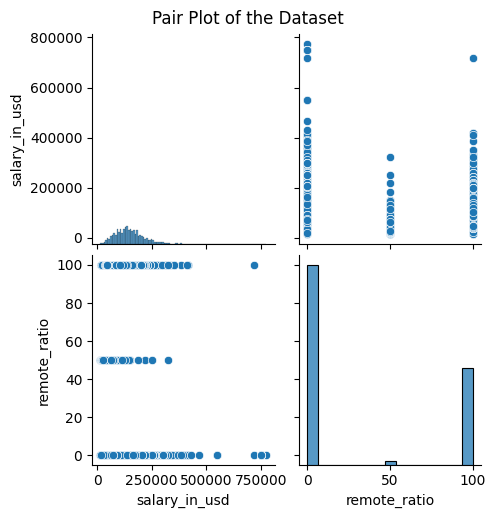

In [201]:
sns.pairplot(data)
plt.suptitle('Pair Plot of the Dataset', y=1.02)
plt.show()

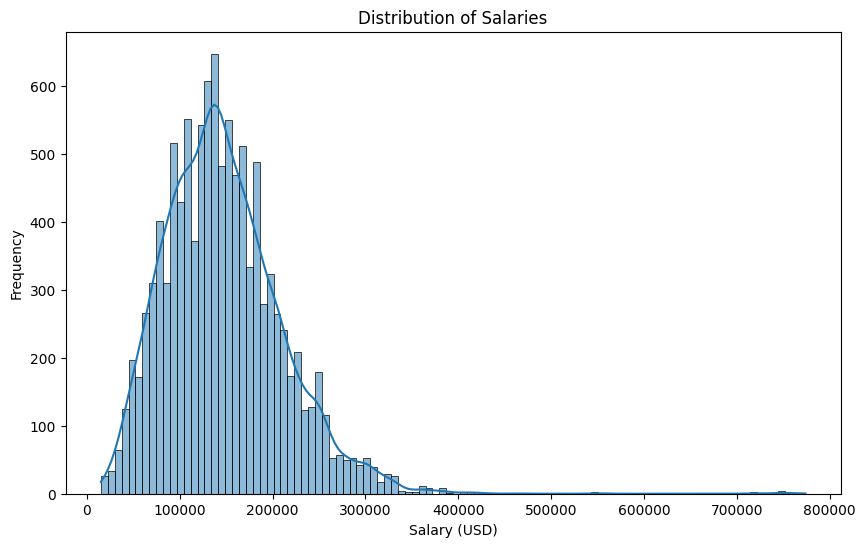

In [200]:
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

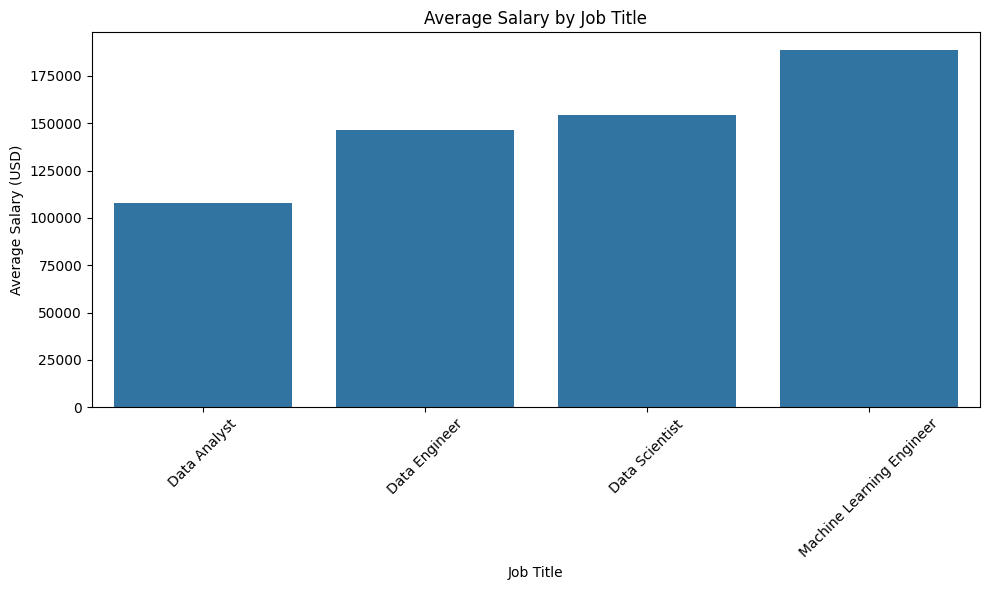

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average salary by job title
average_salary = data.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=average_salary)
plt.xticks(rotation=45)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()
plt.show()

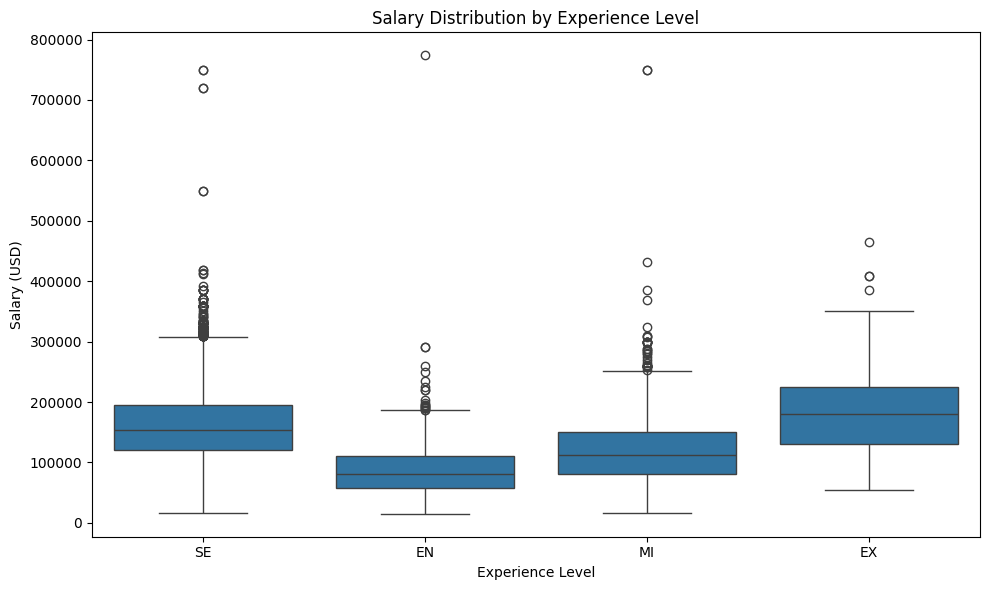

In [198]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

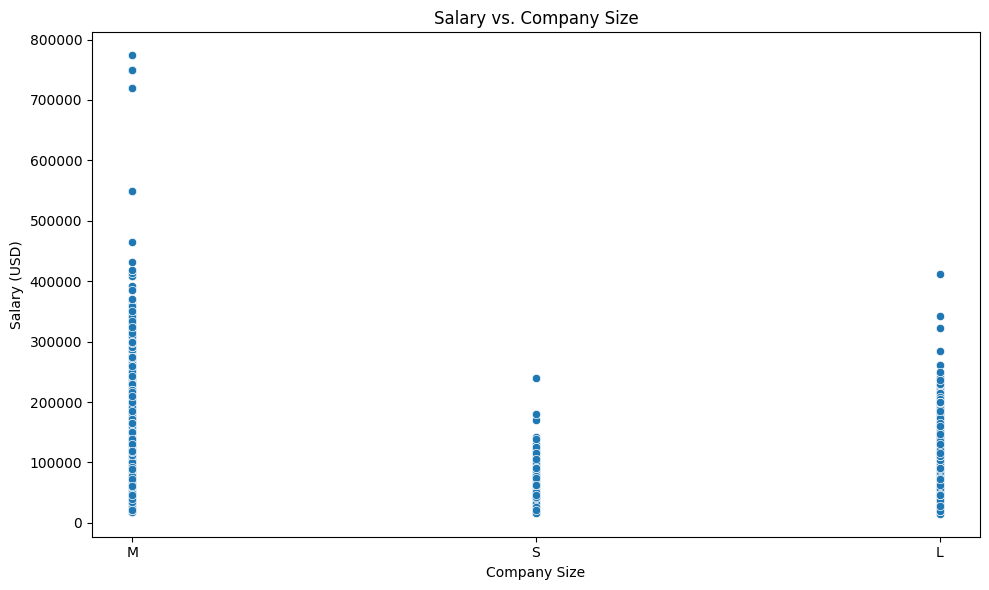

In [188]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_size', y='salary_in_usd', data=data)
plt.title('Salary vs. Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

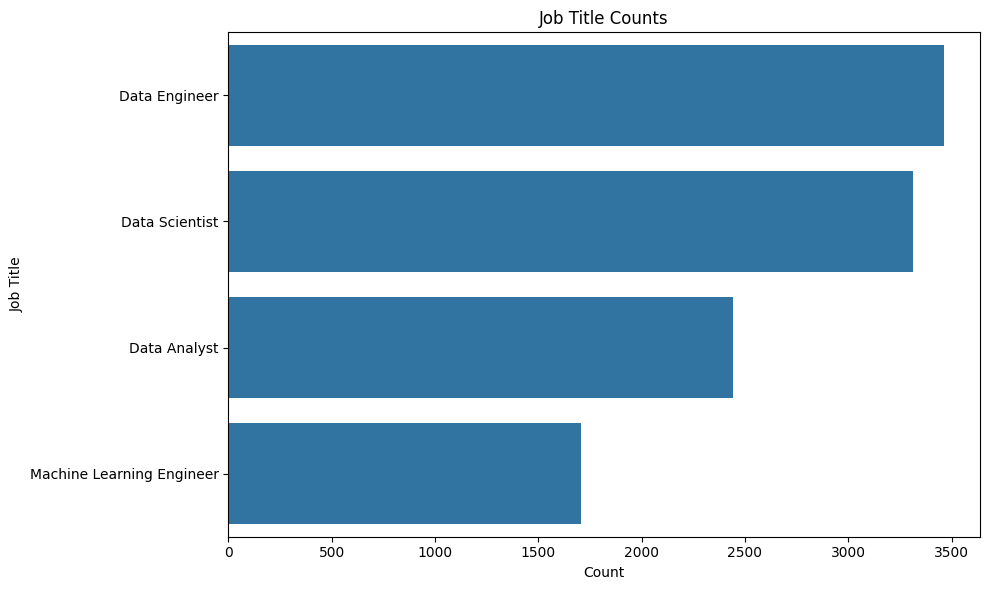

In [189]:
plt.figure(figsize=(10, 6))
sns.countplot(y='job_title', data=data, order=data['job_title'].value_counts().index)
plt.title('Job Title Counts')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

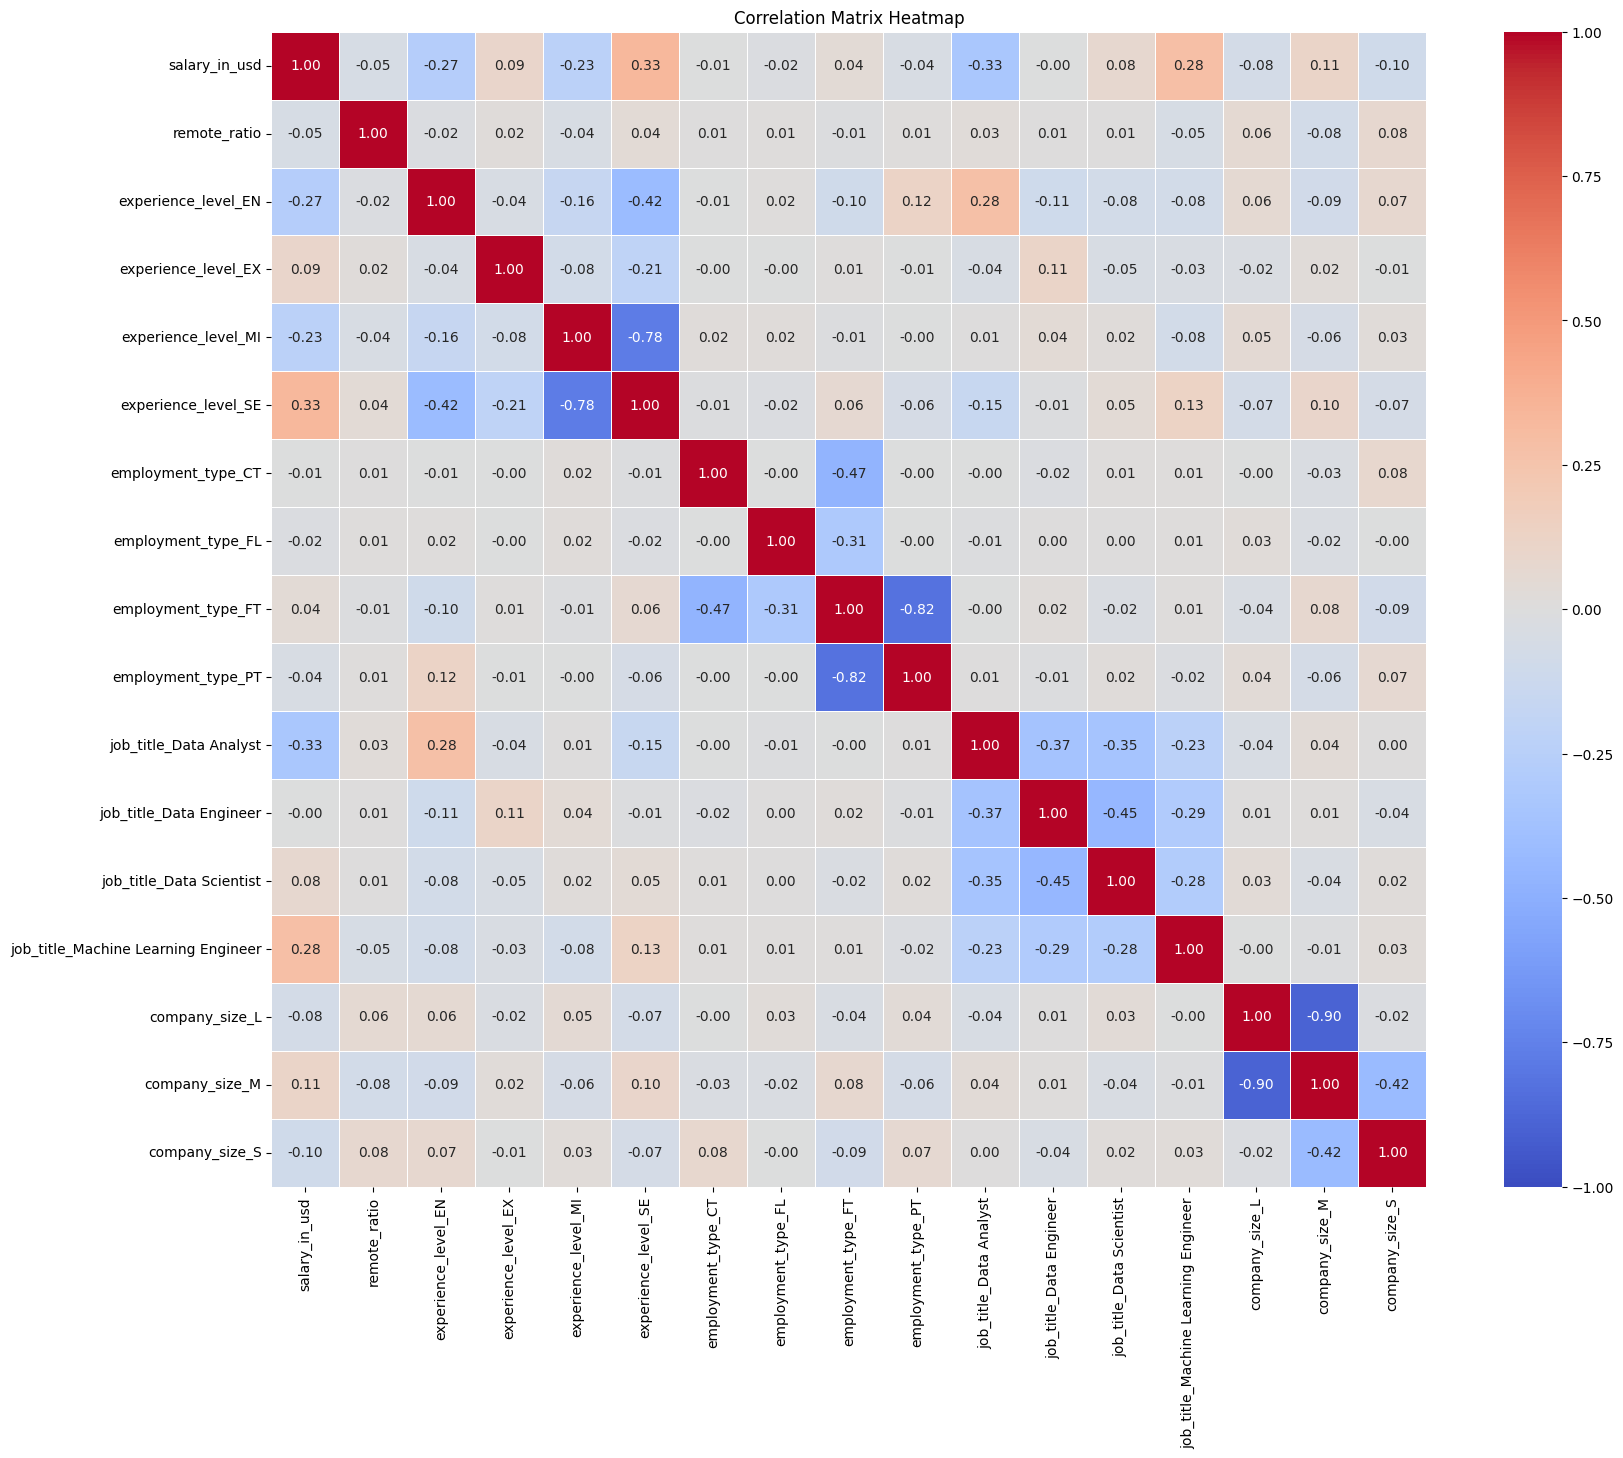

<Figure size 640x480 with 0 Axes>

In [210]:
# Encode categorical variables
df_encoded = pd.get_dummies(data, columns=['experience_level', 'employment_type', 'job_title', 'company_size'])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Observations

 ### The distribution of salaries shows a right skew, indicating most salaries are on the lower end, with fewer high salaries.
 ### The boxplot of salaries by job title reveals that Data Engineers and Machine Learning Engineers tend to have higher salaries compared to Data Analysts.
  ### Senior-level and Expert-level employees generally earn more compared to Entry-level employees.")
  ### The distribution of remote ratio shows that most jobs have a low remote ratio, indicating they are likely on-site roles.
  ### The correlation heatmap helps in identifying the relationships between different features and the target variable (salary_in_usd).

In [181]:
from sklearn.model_selection import train_test_split

# categorical features
categorical_features = ['experience_level', 'employment_type', 'job_title', 'company_size']
df = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

# Get feature columns after encoding
feature_columns = df.columns.tolist()
# Remove the target variable 'salary_in_usd' from the list of feature columns
feature_columns.remove('salary_in_usd')

print("Feature Columns:")
print(feature_columns)

# Split the data into features and target variable
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Columns:
['remote_ratio', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'job_title_Data Engineer', 'job_title_Data Scientist', 'job_title_Machine Learning Engineer', 'company_size_M', 'company_size_S']


In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the random forest model
maer = mean_absolute_error(y_test, y_pred)
mser = mean_squared_error(y_test, y_pred)
r2r = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {maer}')
print(f'Mean Squared Error: {mser}')
print(f'R-squared: {r2r}')

# Save the model and feature columns
joblib.dump(best_rf, 'random_forest_model.pkl')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mean Absolute Error: 40723.39915047715
Mean Squared Error: 3269246661.542006
R-squared: 0.23383894427191032


['random_forest_model.pkl']

In [182]:
from sklearn.tree import export_text, DecisionTreeRegressor

# Initialize and train the Decision Tree model
decisionTreeModel = DecisionTreeRegressor(random_state=42)
decisionTreeModel.fit(X_train, y_train)

# Extract rules from the Decision Tree
tree_rules = export_text(decisionTreeModel, feature_names=list(X.columns))
print(tree_rules)

|--- experience_level_SE <= 0.50
|   |--- experience_level_EX <= 0.50
|   |   |--- experience_level_MI <= 0.50
|   |   |   |--- company_size_M <= 0.50
|   |   |   |   |--- job_title_Machine Learning Engineer <= 0.50
|   |   |   |   |   |--- company_size_S <= 0.50
|   |   |   |   |   |   |--- employment_type_PT <= 0.50
|   |   |   |   |   |   |   |--- remote_ratio <= 75.00
|   |   |   |   |   |   |   |   |--- job_title_Data Scientist <= 0.50
|   |   |   |   |   |   |   |   |   |--- remote_ratio <= 25.00
|   |   |   |   |   |   |   |   |   |   |--- value: [36011.50]
|   |   |   |   |   |   |   |   |   |--- remote_ratio >  25.00
|   |   |   |   |   |   |   |   |   |   |--- job_title_Data Engineer <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [48007.00]
|   |   |   |   |   |   |   |   |   |   |--- job_title_Data Engineer >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [45390.00]
|   |   |   |   |   |   |   |   |--- job_title_Data Scientist >  0.50
|   |   

In [186]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = decisionTreeModel.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Save the model and feature columns
joblib.dump(decisionTreeModel, 'decision_tree_model.pkl')
joblib.dump(feature_columns, 'feature_columns.pkl')


Mean Absolute Error: 40807.51343108284
Mean Squared Error: 3278170655.2647705
R-squared: 0.23174757058256046


['feature_columns.pkl']

['feature_columns.pkl']

In [177]:
from sklearn.tree import _tree


# Function to extract rules from the Decision Tree
def tree_to_prolog(model, feature_names):
    tree = model.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree.feature
    ]

    def recurse(node, depth):
        indent = "    " * depth
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree.threshold[node]
            print(f"{indent}if ({name} <= {threshold}) {{")
            recurse(tree.children_left[node], depth + 1)
            print(f"{indent}}} else {{")
            recurse(tree.children_right[node], depth + 1)
            print(f"{indent}}}")
        else:
            print(f"{indent}return {tree.value[node][0][0]}")

    recurse(0, 1)


# Extract and print rules in Prolog format
feature_names = X.columns
tree_to_prolog(decisionTreeModel, feature_names)

    if (experience_level_SE <= 0.5) {
        if (experience_level_EX <= 0.5) {
            if (experience_level_MI <= 0.5) {
                if (company_size_M <= 0.5) {
                    if (job_title_Machine Learning Engineer <= 0.5) {
                        if (company_size_S <= 0.5) {
                            if (employment_type_PT <= 0.5) {
                                if (remote_ratio <= 75.0) {
                                    if (job_title_Data Scientist <= 0.5) {
                                        if (remote_ratio <= 25.0) {
                                            return 36011.5
                                        } else {
                                            if (job_title_Data Engineer <= 0.5) {
                                                return 48007.0
                                            } else {
                                                return 45390.0
                                            }
                           

In [178]:
def tree_to_prolog(model, feature_names):
    tree = model.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree.feature
    ]

    prolog_rules = []

    def recurse(node, depth):
        indent = "    " * depth
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree.threshold[node]
            prolog_rules.append(f"{indent}if ({name} <= {threshold}) {{")
            recurse(tree.children_left[node], depth + 1)
            prolog_rules.append(f"{indent}}} else {{")
            recurse(tree.children_right[node], depth + 1)
            prolog_rules.append(f"{indent}}}")
        else:
            prolog_rules.append(f"{indent}return {tree.value[node][0][0]}")

    recurse(0, 1)
    return prolog_rules


# Extract rules and convert them to Prolog
prolog_rules = tree_to_prolog(decisionTreeModel, feature_names)

# Write Prolog rules to a file
with open('kb.pl', 'w') as f:
    for rule in prolog_rules:
        f.write(f"{rule}\n")

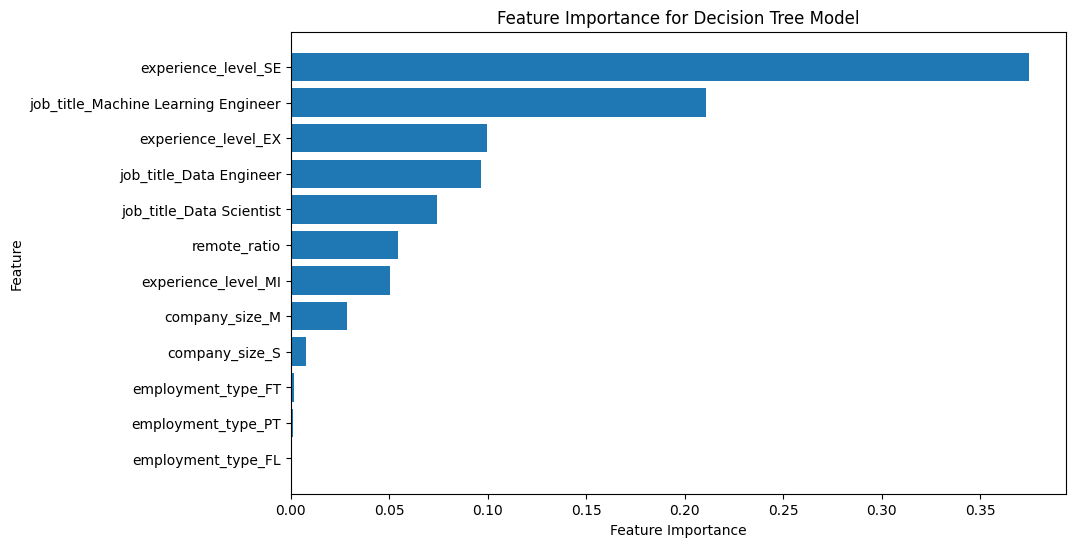

In [179]:
from app import feature_columns
import matplotlib.pyplot as plt


def plot_feature_importance(model, feature_columns):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({'feature': feature_columns, 'importance': importance})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Decision Tree Model')
    plt.gca().invert_yaxis()
    plt.show()


plot_feature_importance(decisionTreeModel, feature_columns)